In [54]:
import random
import numpy as np 
import sys

list = [sys.argv[1].split(',')]

w0 = 5

w1 = 2

w2 = 3

m = 200

n = 200



positives = []

neigitivs = []

fo1 = open('Dataset.txt','w')

for i in range(m):
    while True:
        x1 = np.random.uniform(-10,10,500)
        x2 = np.random.uniform(-10,10,500)
        if x1[i] * w1 + x2[i] * w2 + w0 > 0:
            positives.append('{},{},{}'.format(x1[i],x2[i],"+"))
            print(x1[i],x2[i],'+')
            break

for j in range(n):
    while True:
        x1 = np.random.uniform(-10,10,500)
        x2 = np.random.uniform(-10,10,500)
        if x1[j] * w1 + x2[j] * w2 + w0 < 0:
            neigitivs.append('{},{},{}'.format(x1[j],x2[j],"-"))
            print(x1[j],x2[j],'-')
            break
                    
total = neigitivs + positives

random.shuffle(total)

for i in range(len(total)):
    fo1.write(total[i]+'\n')
    
fo1.close()












8.0405162599187 3.628027072944498 +
1.2978994569302458 0.6554200389959277 +
8.245704334660289 4.221219067572786 +
0.5733697513392837 6.246465953954377 +
8.566419086563297 -3.320660257315417 +
-0.09393587541091541 6.655623821774768 +
1.4741028913818646 6.867630852350011 +
3.3140379537452525 3.975031881533887 +
5.700980786530161 6.551225923491774 +
2.6766779260394014 1.1272353639864896 +
6.641858203470875 6.564606643358122 +
2.903795103631456 -1.9008882643005123 +
-1.0306579984862907 8.695426032806012 +
2.7630617651361877 1.0360383043361132 +
-8.194669988065716 6.223374558964842 +
2.8197754781680278 7.1123803652227835 +
9.656520436784174 -7.499597300379522 +
7.16102948185689 4.71794952949589 +
5.008164077454641 9.892579363594503 +
-3.6846677977928604 3.9796569280545775 +
-5.456040111765541 2.672650268023375 +
8.946289638260481 4.673326410598191 +
3.8023460959650137 0.8769040725495358 +
2.8808815444106344 5.319443763677569 +
1.1983353775193244 4.944219560103429 +
2.5223688724841242 5.1245

['-1,-9.626885966158902,8.939442782913067']
['0,0.21287020335603657,15.48180067560016']
['-1,7.333942748805793,13.235694169938007']


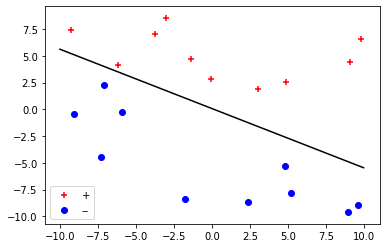

In [45]:
import sys
import numpy as np
import matplotlib.pyplot as plt
 
data_set = []

data_label = []

data_back = []

data_reback1 = []

data_reback2 = []

file = open('Dataset.txt','r')

for line in file:
    line=line.rstrip("\n")
    line1 = line.split(',')
    data_back.append(line1)
    
file.close()    

for i in range(len(data_back)):
    if data_back[i][-1] == '+':
        data_reback1.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'1'))
    else:
        data_reback2.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'-1'))

data_reback = data_reback1+data_reback2   

fo1 = open('3.txt','w')
for i in range(len(data_reback)):
    fo1.write(data_reback[i]+'\n')     
fo1.close()

file1 = open('3.txt','r')

for line in file1:
    line=line.rstrip("\n")
    line1 = line.split(',')
    for i in range(len(line1)):
        line1[i] = float(line1[i])
    data_set.append(line1[0:2])
    data_label.append(int(line1[-1]))    
file1.close()
data = np.array(data_set)
label = np.array(data_label)
# 初始化w, b, alpha
w = np.array([0, 0])
w0 = 0
alpha = 1
# 计算 y*(w*x+b)
f = (np.dot(data, w.T) + b) * label

idx = np.where(f <= 0)

# 使用随机梯度下降法求解w, b

w_countlist = []

while f[idx].size != 0:
    
    point = np.random.randint((f[idx].shape[0]))
    
    x = data[idx[0][point], :]
    
    y = label[idx[0][point]]
    
    w = w + alpha * y * x
    
    w0 = w0 + alpha * y
    
    w_countlist.append('{},{},{}'.format(w0,w[0],w[1]))
                        
    f = (np.dot(data, w.T) + w0) * label
    
    idx = np.where(f <= 0)

for i in range(len(w_countlist)):
    print([w_countlist[i]])


# 绘图显示
x1 = np.arange(-10, 10, 0.01)
x2 = (w[0] * x1 + w0) / (-w[1])
idx_p = np.where(label == 1)
idx_n = np.where(label != 1)
data_p = data[idx_p]
data_n = data[idx_n]

plt.plot(x1, x2,color='black')

plt.scatter(data_p[:, 0], data_p[:, 1], color='red',marker="+",label='+')
plt.scatter(data_n[:, 0], data_n[:, 1], color='blue',marker="o",label='--')
plt.legend(loc='best')
plt.show()



In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import copy

data_set = []
data_label = []
data_back = []
data_reback1 = []
data_reback2 = []

file = open('Dataset.txt','r')

for line in file:
    line=line.rstrip("\n")
    line1 = line.split(',')
    data_back.append(line1)
file.close()

for i in range(len(data_back)):
    if data_back[i][-1] == '+':
        data_reback1.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'1'))
    else:
        data_reback2.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'-1'))

data_reback = data_reback1+data_reback2

fo1 = open('3.txt','w')

for i in range(len(data_reback)):
    
    fo1.write(data_reback[i]+'\n')  
    
fo1.close()

training_data = open('3.txt','r')

training_set = []

for line in training_data:
    line=line.rstrip("\n")
    line1 = line.split(',')
    for i in range(len(line1)):
        line1[i] = float(line1[i])
    data_set.append(line1[0:2])
    data_label.append(int(line1[-1]))

for j in range(len(data_set)):
    for j in range(len(data_label)):
        training_set.append([tuple(data_set[j]),data_label[j]])

w = [0, 0]  # 参数初始化
b = 0
history = []  # 用来记录每次更新过后的w,b



def update(item):
    """
    随机梯度下降更新参数
    :param item: 参数是分类错误的点
    :return: nothing 无返回值
    """
    global w, b, history  # 把w, b, history声明为全局变量
    w[0] += 1 * item[1] * item[0][0]  # 根据误分类点更新参数,这里学习效率设为1
    w[1] += 1 * item[1] * item[0][1]
    b += 1 * item[1]
    history.append([copy.copy(w), b])  # 将每次更新过后的w,b记录在history数组中
    
def cal(item):
    """
    计算item到超平面的距离,输出yi(w*xi+b)
    （我们要根据这个结果来判断一个点是否被分类错了。如果yi(w*xi+b)>0,则分类错了）
    :param item:
    :return:
    """
    res = 0
    for i in range(len(item[0])):  # 迭代item的每个坐标，对于本文数据则有两个坐标x1和x2
        res += item[0][i] * w[i]
    res += b
    res *= item[1]  # 这里是乘以公式中的yi
    return res


def check():
    """
    检查超平面是否已将样本正确分类
    :return: true如果已正确分类则返回True
    """
    flag = False
    for item in training_set:
        if cal(item) <= 0:  # 如果有分类错误的
            flag = True  # 将flag设为True
            update(item)  # 用误分类点更新参数
    if not flag:  # 如果没有分类错误的点了
        print("最终结果: w: " + str(w) + "b: " + str(b))  # 输出达到正确结果时参数的值
    return flag  # 如果已正确分类则返回True,否则返回False


if __name__ == "__main__":
    for i in range(1000):  # 迭代1000遍
        if not check(): 
            break  # 如果已正确分类，则结束迭代
    # 以下代码是将迭代过程可视化
    # 首先建立我们想要做成动画的图像figure, 坐标轴axis,和plot element
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [], 'g', lw=2)  # 画一条线
    label = ax.text([], [], '')


    def init():
        line.set_data([], [])
        x, y, x_, y_ = [], [], [], []
        for p in training_set:
            if p[1] > 0:
                x.append(p[0][0])  # 存放yi=1的点的x1坐标
                y.append(p[0][1])  # 存放yi=1的点的x2坐标
            else:
                x_.append(p[0][0])  # 存放yi=-1的点的x1坐标
                y_.append(p[0][1])  # 存放yi=-1的点的x2坐标
        plt.plot(x, y, 'bo', x_, y_, 'rx')  # 在图里yi=1的点用点表示，yi=-1的点用叉表示
        plt.axis([-6, 6, -6, 6])  # 横纵坐标上下限
        plt.grid(True)  # 显示网格
        plt.xlabel('x1')  # 这里我修改了原文表示
        plt.ylabel('x2')  # 为了和原理中表达方式一致，横纵坐标应该是x1,x2
        plt.title('Perceptron Algorithm (www.hankcs.com)')  # 给图一个标题：感知机算法
        return line, label

    def animate(i):
        global history, ax, line, label
        w = history[i][0]
        b = history[i][1]
        if w[1] == 0: 
            return line, label
        # 因为图中坐标上下限为-6~6，所以我们在横坐标为-7和7的两个点之间画一条线就够了，这里代码中的xi,yi其实是原理中的x1,x2
        x1 = -7
        y1 = -(b + w[0] * x1) / w[1]
        x2 = 7
        y2 = -(b + w[0] * x2) / w[1]
        line.set_data([x1, x2], [y1, y2])  # 设置线的两个点
        x1 = 0
        y1 = -(b + w[0] * x1) / w[1]
        label.set_text(history[i])
        label.set_position([x1, y1])
        return line, label


    print("参数w,b更新过程：", history)
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=1000, repeat=True,
                                   blit=True)
    plt.show()

最终结果: w: [845.2355447374437, 425.98148693571795]b: 3
参数w,b更新过程： [[[766.8090200098125, 473.7273020730322], 1], [[1015.9194913132278, 19.513030023449687], 2], [[845.2355447374437, 425.98148693571795], 3]]


TypeError: float() argument must be a string or a number, not 'list'

<Figure size 432x288 with 1 Axes>

['-1,5.409188334131104,-0.5059167264965208']
['0,3.002484227833424,5.611264702601245']
['1,2.7618371333063543,5.287015712136762']
['2,3.6190742629660413,3.811293467795112']
['3,-5.131106967190229,11.318268765661786']
['4,3.560488818266821,12.564719156952604']
['5,4.417725947926508,11.088996912610954']
['6,12.638871140708195,6.702536233684067']
['7,3.2010060809721796,13.758386312407843']
['6,12.080122380981335,10.561450737239346']
['5,4.004785262542667,18.125331613383505']
['4,12.966751227381565,14.107509215373662']
['5,12.726104132854495,13.78326022490918']
['6,7.688626732289994,15.577721472535462']
['7,7.447979637762924,15.253472482070979']
['8,15.208567183815958,10.254073946147663']
['9,6.458385953659688,17.761049244014337']
['10,7.315623083319375,16.285326999672687']
['9,16.277589048158273,12.267504601662845']
['8,6.860440011817392,20.672527741866425']
['9,7.717677141477079,19.196805497524775']
['10,8.574914271136766,17.721083253183124']
['11,3.5374368705722654,19.515544500809405']


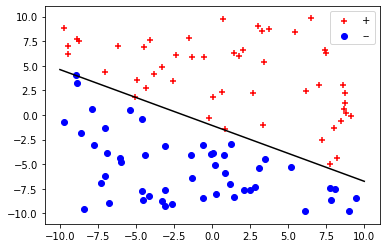

In [47]:
import sys
import numpy as np
import matplotlib.pyplot as plt
 
data_set = []

data_label = []

data_back = []

data_reback1 = []

data_reback2 = []

file = open('Dataset.txt','r')

for line in file:
    line=line.rstrip("\n")
    line1 = line.split(',')
    data_back.append(line1)
    
file.close()    

for i in range(len(data_back)):
    if data_back[i][-1] == '+':
        data_reback1.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'1'))
    else:
        data_reback2.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'-1'))

data_reback = data_reback1+data_reback2   

fo1 = open('3.txt','w')
for i in range(len(data_reback)):
    fo1.write(data_reback[i]+'\n')     
fo1.close()

file1 = open('3.txt','r')

for line in file1:
    line=line.rstrip("\n")
    line1 = line.split(',')
    for i in range(len(line1)):
        line1[i] = float(line1[i])
    data_set.append(line1[0:2])
    data_label.append(int(line1[-1]))    
file1.close()
data = np.array(data_set)
label = np.array(data_label)
# 初始化w, b, alpha
w = np.array([0, 0])
w0 = 0
alpha = 1
# 计算 y*(w*x+b)
f = (np.dot(data, w.T) + b) * label

idx = np.where(f <= 0)

# 使用随机梯度下降法求解w, b

w_countlist = []

while f[idx].size != 0:
    
    point = np.random.randint((f[idx].shape[0]))
    
    x = data[idx[0][point], :]
    
    y = label[idx[0][point]]
    
    w = w + alpha * y * x
    
    w0 = w0 + alpha * y
    
    w_countlist.append('{},{},{}'.format(w0,w[0],w[1]))
                        
    f = (np.dot(data, w.T) + w0) * label
    
    idx = np.where(f <= 0)

for i in range(len(w_countlist)):
    print([w_countlist[i]])


# 绘图显示
x1 = np.arange(-10, 10, 0.01)
x2 = (w[0] * x1 + w0) / (-w[1])
idx_p = np.where(label == 1)
idx_n = np.where(label != 1)
data_p = data[idx_p]
data_n = data[idx_n]

plt.plot(x1, x2,color='black')

plt.scatter(data_p[:, 0], data_p[:, 1], color='red',marker="+",label='+')
plt.scatter(data_n[:, 0], data_n[:, 1], color='blue',marker="o",label='--')
plt.legend(loc='best')
plt.show()

['-1,4.708474073134843,1.260544793031963']
['-2,-2.6066095828917515,8.010776898341868']
['-3,6.121103163323692,9.642515303422007']
['-2,4.3936117887640815,10.150628255785533']
['-1,14.16029738291685,5.943261471025076']
['-2,9.57269310077403,11.339485135667326']
['-1,16.70997804712821,5.263322244984138']
['0,16.71783627587312,4.997020728968511']
['-1,12.060788652012025,11.10639689961231']
['0,5.458774394162978,14.851355659602312']
['-1,13.432526841423915,11.755536921664458']
['0,5.285121932042809,20.98942713508394']
['1,5.292980160787719,20.723125619068313']
['2,13.752511293024442,14.391647147316686']
['3,9.079748704234444,16.11115035051665']
['4,6.239388979268979,16.440076470190043']
['5,3.399029254303514,16.769002589863433']
['4,10.347410511459938,14.900684875024783']
['5,2.4383161676799983,19.57317822765384']
['6,2.446174396424908,19.306876711638214']
['5,9.86367915328516,17.460083311977613']
['6,18.55377458466411,11.684159243241295']
['5,11.238690928637517,18.434391348551202']
['6,4

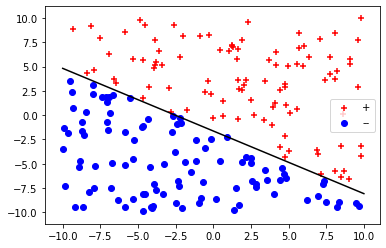

In [49]:
import sys
import numpy as np
import matplotlib.pyplot as plt
 
data_set = []

data_label = []

data_back = []

data_reback1 = []

data_reback2 = []

file = open('Dataset.txt','r')

for line in file:
    line=line.rstrip("\n")
    line1 = line.split(',')
    data_back.append(line1)
    
file.close()    

for i in range(len(data_back)):
    if data_back[i][-1] == '+':
        data_reback1.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'1'))
    else:
        data_reback2.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'-1'))

data_reback = data_reback1+data_reback2   

fo1 = open('3.txt','w')
for i in range(len(data_reback)):
    fo1.write(data_reback[i]+'\n')     
fo1.close()

file1 = open('3.txt','r')

for line in file1:
    line=line.rstrip("\n")
    line1 = line.split(',')
    for i in range(len(line1)):
        line1[i] = float(line1[i])
    data_set.append(line1[0:2])
    data_label.append(int(line1[-1]))    
file1.close()
data = np.array(data_set)
label = np.array(data_label)
# 初始化w, b, alpha
w = np.array([0, 0])
w0 = 0
alpha = 1
# 计算 y*(w*x+b)
f = (np.dot(data, w.T) + b) * label

idx = np.where(f <= 0)

# 使用随机梯度下降法求解w, b

w_countlist = []

while f[idx].size != 0:
    
    point = np.random.randint((f[idx].shape[0]))
    
    x = data[idx[0][point], :]
    
    y = label[idx[0][point]]
    
    w = w + alpha * y * x
    
    w0 = w0 + alpha * y
    
    w_countlist.append('{},{},{}'.format(w0,w[0],w[1]))
                        
    f = (np.dot(data, w.T) + w0) * label
    
    idx = np.where(f <= 0)

for i in range(len(w_countlist)):
    print([w_countlist[i]])


# 绘图显示
x1 = np.arange(-10, 10, 0.01)
x2 = (w[0] * x1 + w0) / (-w[1])
idx_p = np.where(label == 1)
idx_n = np.where(label != 1)
data_p = data[idx_p]
data_n = data[idx_n]

plt.plot(x1, x2,color='black')

plt.scatter(data_p[:, 0], data_p[:, 1], color='red',marker="+",label='+')
plt.scatter(data_n[:, 0], data_n[:, 1], color='blue',marker="o",label='--')
plt.legend(loc='best')
plt.show()

['-1,-6.037697910503361,8.031834236281552']
['0,-2.8769654909225135,6.581451943464067']
['-1,5.4649640222211175,7.524084567848989']
['0,2.298013260243928,8.226743933909976']
['1,0.8805408044586782,8.058983052193078']
['0,9.954593117994442,3.873725490751818']
['-1,2.1762079482791066,11.305132071276724']
['-2,11.72860121922609,7.707663176174508']
['-3,6.251622121153371,13.283735867154844']
['-2,2.842999759306582,14.27527408257165']
['-1,10.36865371751254,9.852230958286157']
['-2,2.2404222853962317,17.66835506592261']
['-1,8.97221567118595,16.220868942931805']
['0,12.620150749461,13.697992284338635']
['1,2.655425456866018,21.249831798456682']
['0,11.72947777040178,17.06457423701542']
['1,18.00327110530943,11.383447687157796']
['2,14.83632034333224,12.086107053218782']
['1,9.134241618671352,17.611251488041134']
['2,16.880574909994564,10.949674966381394']
['3,13.284741535972787,15.30321378688796']
['4,4.946948478660472,20.786255656428153']
['5,4.892149948669349,19.367876388788538']
['4,9.79

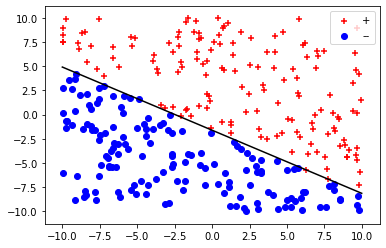

In [53]:
import sys
import numpy as np
import matplotlib.pyplot as plt
 
data_set = []

data_label = []

data_back = []

data_reback1 = []

data_reback2 = []

file = open('Dataset.txt','r')

for line in file:
    line=line.rstrip("\n")
    line1 = line.split(',')
    data_back.append(line1)
    
file.close()    

for i in range(len(data_back)):
    if data_back[i][-1] == '+':
        data_reback1.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'1'))
    else:
        data_reback2.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'-1'))

data_reback = data_reback1+data_reback2   

fo1 = open('3.txt','w')
for i in range(len(data_reback)):
    fo1.write(data_reback[i]+'\n')     
fo1.close()

file1 = open('3.txt','r')

for line in file1:
    line=line.rstrip("\n")
    line1 = line.split(',')
    for i in range(len(line1)):
        line1[i] = float(line1[i])
    data_set.append(line1[0:2])
    data_label.append(int(line1[-1]))    
file1.close()
data = np.array(data_set)
label = np.array(data_label)
# 初始化w, b, alpha
w = np.array([0, 0])
w0 = 0
alpha = 1
# 计算 y*(w*x+b)
f = (np.dot(data, w.T) + b) * label

idx = np.where(f <= 0)

# 使用随机梯度下降法求解w, b

w_countlist = []

while f[idx].size != 0:
    
    point = np.random.randint((f[idx].shape[0]))
    
    x = data[idx[0][point], :]
    
    y = label[idx[0][point]]
    
    w = w + alpha * y * x
    
    w0 = w0 + alpha * y
    
    w_countlist.append('{},{},{}'.format(w0,w[0],w[1]))
                        
    f = (np.dot(data, w.T) + w0) * label
    
    idx = np.where(f <= 0)

for i in range(len(w_countlist)):
    print([w_countlist[i]])


# 绘图显示
x1 = np.arange(-10, 10, 0.01)
x2 = (w[0] * x1 + w0) / (-w[1])
idx_p = np.where(label == 1)
idx_n = np.where(label != 1)
data_p = data[idx_p]
data_n = data[idx_n]

plt.plot(x1, x2,color='black')

plt.scatter(data_p[:, 0], data_p[:, 1], color='red',marker="+",label='+')
plt.scatter(data_n[:, 0], data_n[:, 1], color='blue',marker="o",label='--')
plt.legend(loc='best')
plt.show()

['-1,-4.061272574129571,8.462026923244482']
['0,4.168542778728977,3.322416942902935']
['1,-2.5655607269679033,10.657156136129297']
['0,7.2791371796717135,9.220622758471007']
['1,15.105976230326227,2.4358079582062295']
['2,14.691490315839184,3.3858514564737856']
['3,5.4193586323655065,9.59975933139114']
['4,-2.559623994772714,13.7820460551973']
['5,0.005536992639679994,11.634426471441493']
['4,8.420827234298857,9.368946098959162']
['5,4.428994800571026,11.815851490747']
['6,13.939251162133687,4.656927264919804']
['7,5.490716570742066,12.513756262832235']
['8,8.449130484163183,10.579133498234835']
['9,4.493268267949097,11.939661816556347']
['10,7.451682181370214,10.005039051958947']
['11,1.9956420696046733,12.677689319982322']
['10,11.840339976244291,11.241155942324033']
['11,6.38429986447875,13.913806210347408']
['12,15.778782600171853,6.590664606068881']
['11,6.75930922676673,16.041763589346036']
['12,12.491284934005348,11.190754701789507']
['13,4.512302306867127,15.373041425595668']
[

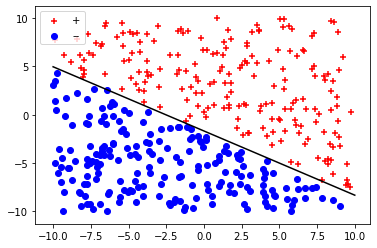

In [55]:
import sys
import numpy as np
import matplotlib.pyplot as plt
 
data_set = []

data_label = []

data_back = []

data_reback1 = []

data_reback2 = []

file = open('Dataset.txt','r')

for line in file:
    line=line.rstrip("\n")
    line1 = line.split(',')
    data_back.append(line1)
    
file.close()    

for i in range(len(data_back)):
    if data_back[i][-1] == '+':
        data_reback1.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'1'))
    else:
        data_reback2.append('{},{},{}'.format(data_back[i][0],data_back[i][1],'-1'))

data_reback = data_reback1+data_reback2   

fo1 = open('3.txt','w')
for i in range(len(data_reback)):
    fo1.write(data_reback[i]+'\n')     
fo1.close()

file1 = open('3.txt','r')

for line in file1:
    line=line.rstrip("\n")
    line1 = line.split(',')
    for i in range(len(line1)):
        line1[i] = float(line1[i])
    data_set.append(line1[0:2])
    data_label.append(int(line1[-1]))    
file1.close()
data = np.array(data_set)
label = np.array(data_label)
# 初始化w, b, alpha
w = np.array([0, 0])
w0 = 0
alpha = 1
# 计算 y*(w*x+b)
f = (np.dot(data, w.T) + b) * label

idx = np.where(f <= 0)

# 使用随机梯度下降法求解w, b

w_countlist = []

while f[idx].size != 0:
    
    point = np.random.randint((f[idx].shape[0]))
    
    x = data[idx[0][point], :]
    
    y = label[idx[0][point]]
    
    w = w + alpha * y * x
    
    w0 = w0 + alpha * y
    
    w_countlist.append('{},{},{}'.format(w0,w[0],w[1]))
                        
    f = (np.dot(data, w.T) + w0) * label
    
    idx = np.where(f <= 0)

for i in range(len(w_countlist)):
    print([w_countlist[i]])


# 绘图显示
x1 = np.arange(-10, 10, 0.01)
x2 = (w[0] * x1 + w0) / (-w[1])
idx_p = np.where(label == 1)
idx_n = np.where(label != 1)
data_p = data[idx_p]
data_n = data[idx_n]

plt.plot(x1, x2,color='black')

plt.scatter(data_p[:, 0], data_p[:, 1], color='red',marker="+",label='+')
plt.scatter(data_n[:, 0], data_n[:, 1], color='blue',marker="o",label='--')
plt.legend(loc='best')
plt.show()